In [1]:
import xarray as xr
import netCDF4 as nc 
import numpy as np

from  wtc_pbl import *
from plot_as_sce import *


In [2]:
filename = '/home/medico_eafit/WORKSPACES/sebastian_carmona/data/EAFIT/Dataset1/LiMon_Raw_Data_cc/2022/04/13/RS/LPP_OUT/RS_L0_L1_L2.nc'
ncfile = nc.Dataset(filename)
group = ncfile.groups['L2_Data']
dataset = xr.open_dataset(xr.backends.NetCDF4DataStore(group))
global_attributes = {attr: ncfile.getncattr(attr) for attr in ncfile.ncattrs()}

start_time = dataset.Start_Time_AVG_L2.values.astype('float32') // 10**9
stop_time = dataset.Stop_Time_AVG_L2.values

avg_time = (start_time + stop_time) / 2

datetime_ns = np.array(avg_time, dtype='datetime64[s]')
datetime_ns = datetime_ns.astype('datetime64[ns]') 

dataset = dataset.assign_coords(time=datetime_ns)

dataset = dataset.sel(channels=0, range=slice(100, 5000))

dataset

<xarray.Dataset> Size: 70MB
Dimensions:                          (time: 605, lrs: 5, range: 1306)
Coordinates:
  * range                            (range) float64 10kB 103.1 ... 4.997e+03
  * time                             (time) datetime64[ns] 5kB 2022-04-13T15:...
Dimensions without coordinates: lrs
Data variables:
    Aerosol_Extinction               (time, lrs, range) float64 32MB ...
    Aerosol_Backscattering           (time, lrs, range) float64 32MB ...
    Range_Corrected_Lidar_Signal_L2  (time, range) float64 6MB ...
    Start_Time_AVG_L2                (time) datetime64[ns] 5kB 2022-04-13T15:...
    Stop_Time_AVG_L2                 (time) int32 2kB 1649865288 ... 1649885480
    Zenith_AVG_L2                    (time) float64 5kB ...
    Azimuth_AVG_L2                   (time) float64 5kB ...
    MaxRangeAnalysis                 (time) float64 5kB ...
    LRs                              (lrs) float64 40B ...
    AOD_LR                           (time, lrs) float64 24kB ...
    Ref_Range_ASL_m                  (time) float64 5kB ...
    Fernald_smooth_bins              int32 4B ...
Attributes:
    indxChannel_for_Fernald_inv:  0
    Wavelength_Inverted:          532
    Averaged_Profiles_L2:         1
    R_Ref:                        1.0

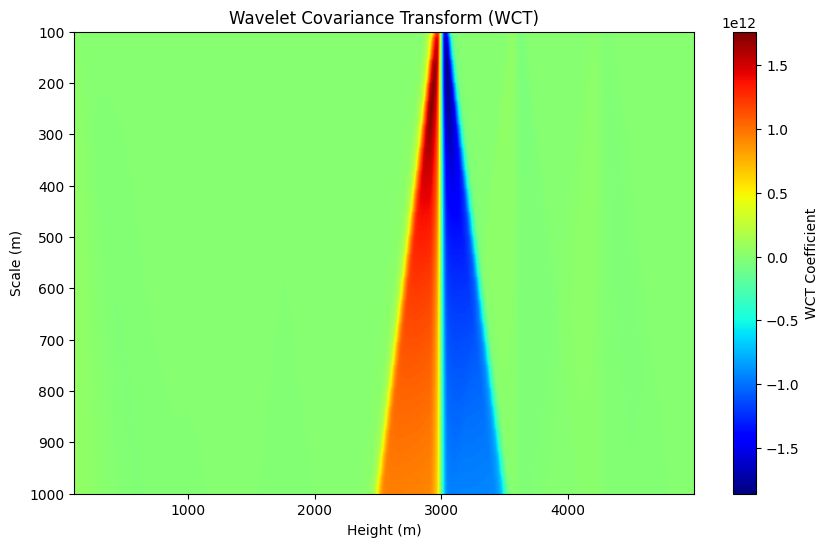

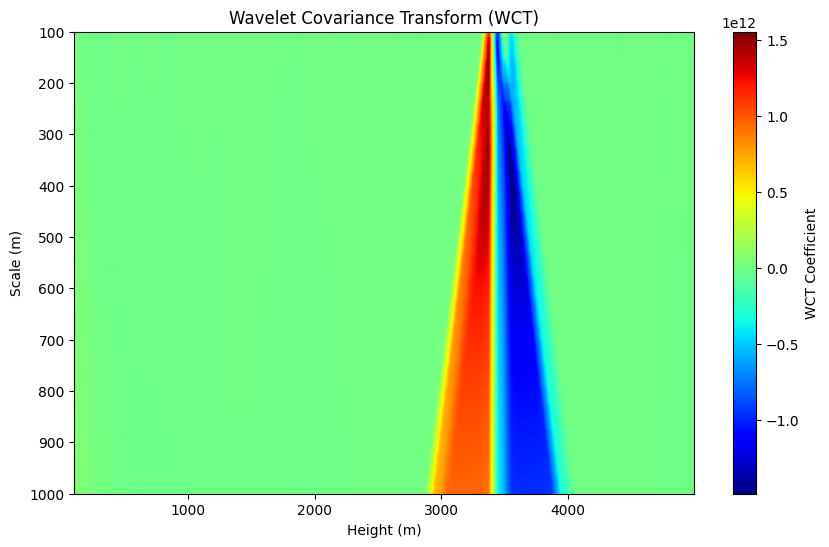

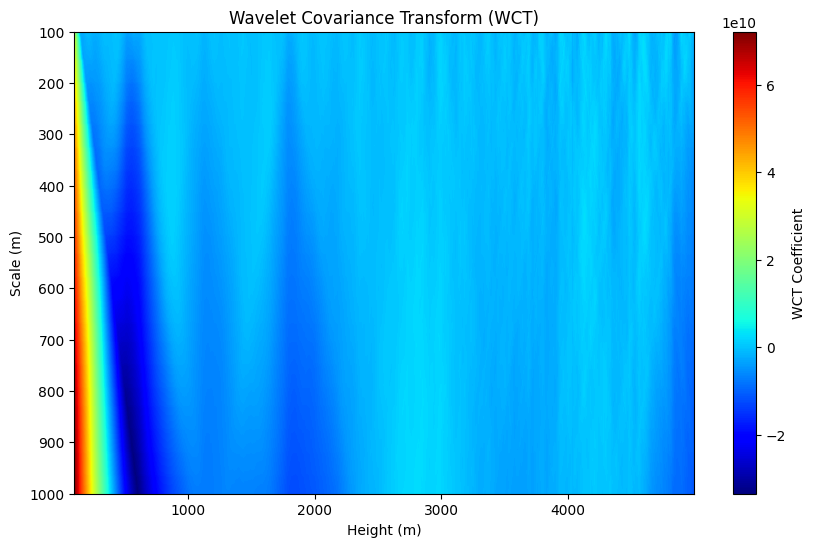

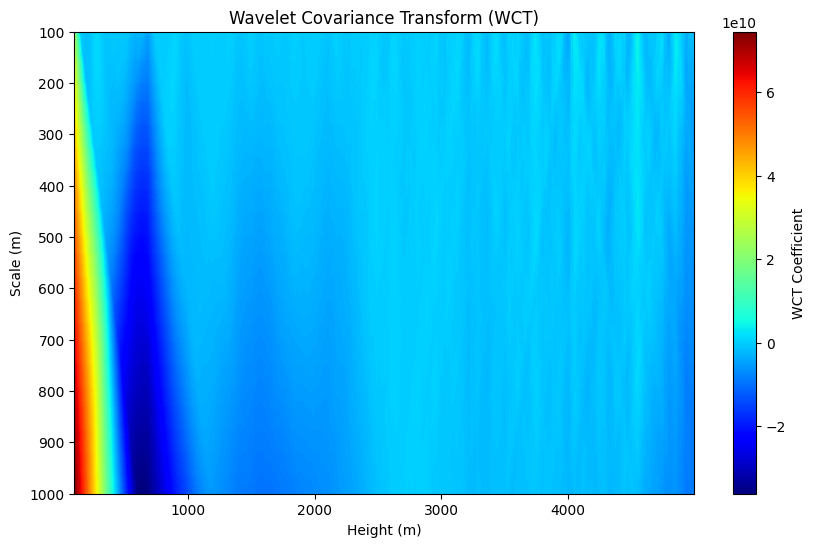

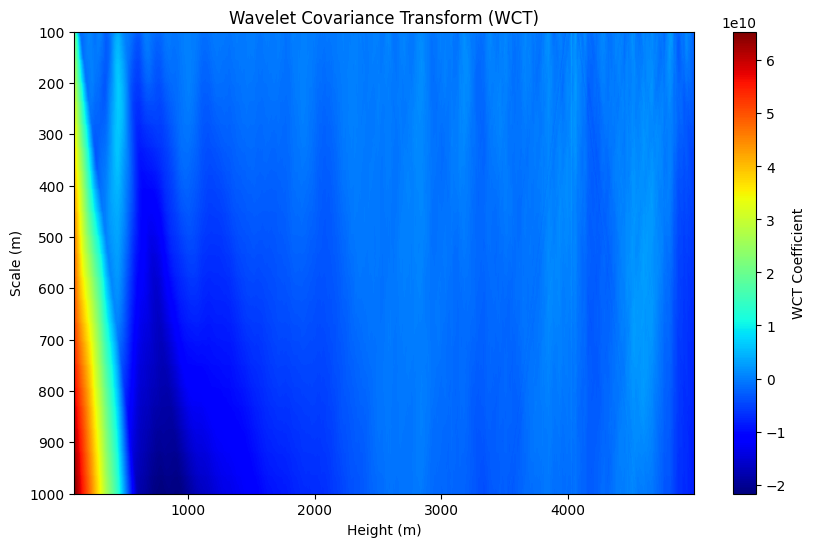

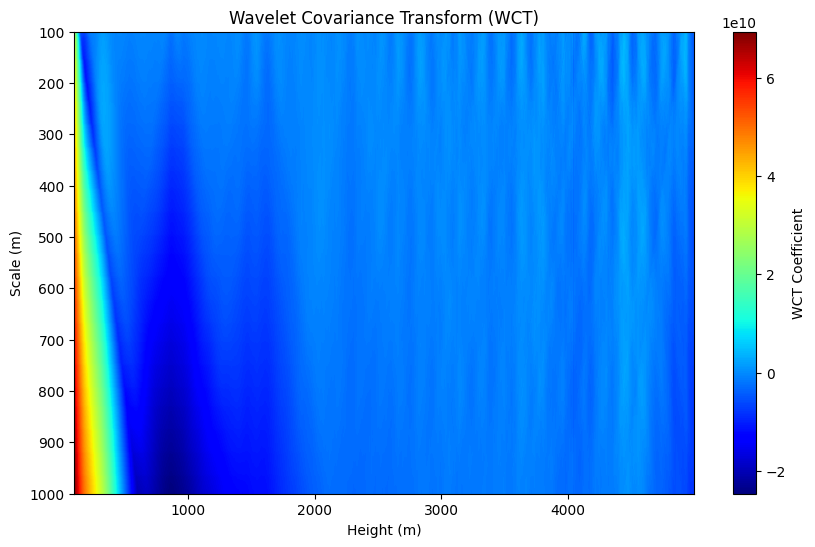

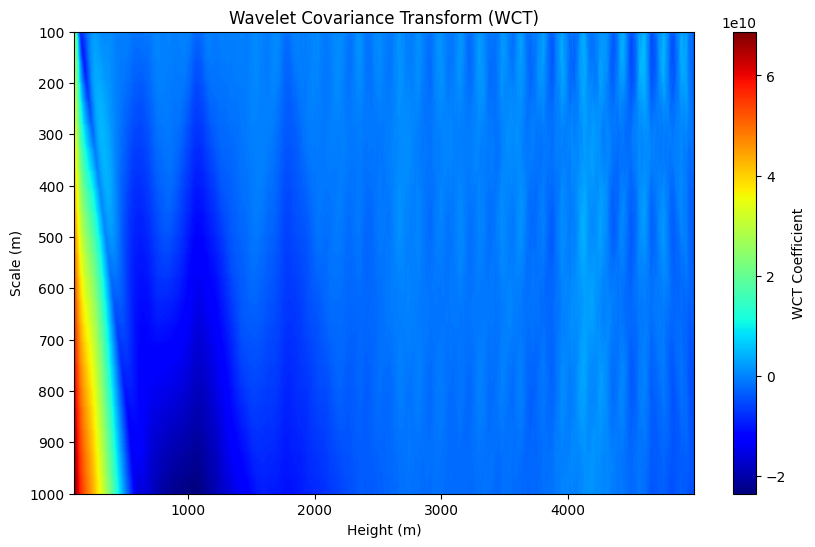

In [4]:
signal_variable = 'Range_Corrected_Lidar_Signal_L2'  # Replace with your signal variable name
range_variable = 'range'  # Replace with your range variable name
time_variable = 'time'  # Replace with your time variable name

# Define scales to use (in km)
scales = np.linspace(100, 1000, 100) 

# pdb.set_trace()    

# Process the dataset
pbl_heights = process_lidar_dataset(
    dataset.sel(range=slice(100, 5000)),
    signal_variable,
    range_variable,
    time_variable,
    scales
)


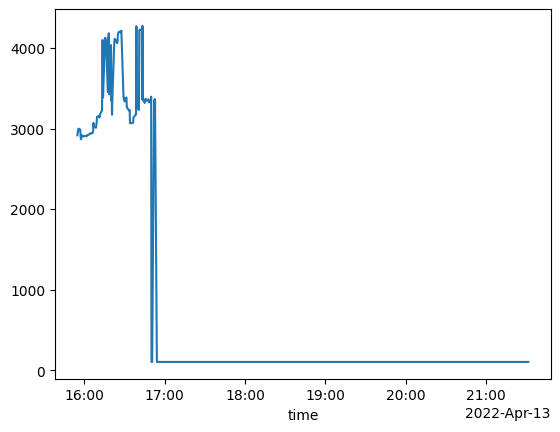

In [5]:
pbl_heights.plot()

In [7]:
# Save the PBL heights to a new NetCDF file
pbl_heights.to_netcdf('/home/medico_eafit/WORKSPACES/sebastian_carmona/dev/WTC_PBL_METHOD/outputs/pbl_heights.nc')
pbl_heights

<xarray.DataArray (time: 605)> Size: 5kB
array([2915.625, 2960.625, 2960.625, 2998.125, 2986.875, 2904.375,
       2866.875, 2870.625, 2919.375, 2900.625, 2904.375, 2908.125,
       2904.375, 2904.375, 2911.875, 2915.625, 2919.375, 2915.625,
       2930.625, 2934.375, 2941.875, 2938.125, 2938.125, 2945.625,
       2971.875, 3069.375, 3024.375, 3013.125, 3009.375, 3039.375,
       3069.375, 3144.375, 3155.625, 3151.875, 3136.875, 3174.375,
       3215.625, 3234.375, 4096.875, 4096.875, 3384.375, 4123.125,
       4126.875, 4096.875, 3451.875, 4123.125, 4138.125, 4183.125,
       3421.875, 4036.875, 3346.875, 3399.375, 3170.625, 3373.125,
       4051.875, 4111.875, 4108.125, 4104.375, 4059.375, 4063.125,
       4153.125, 4171.875, 4194.375, 4205.625, 4190.625, 4198.125,
       4213.125, 3470.625, 3376.875, 3365.625, 3380.625, 3335.625,
       3384.375, 3268.125, 3264.375, 3249.375, 3219.375, 3230.625,
       3065.625, 3065.625, 3065.625, 3069.375, 3069.375, 3080.625,
       3140.625, 3163.125, 3185.625, 3181.875, 4269.375, 3241.875,
       3256.875, 3230.625, 4220.625, 4224.375, 4228.125, 4224.375,
       3361.875, 4273.125, 3358.125, 3316.875, 3361.875, 3361.875,
       3369.375, 3343.125, 3354.375, 3354.375, 3361.875, 3324.375,
       3331.875, 3395.625,  103.125,  103.125,  103.125, 3346.875,
       3354.375, 3365.625, 3350.625,  103.125,  103.125,  103.125,
...
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125,  103.125,
        103.125,  103.125,  103.125,  103.125,  103.125])
Coordinates:
  * time     (time) datetime64[ns] 5kB 2022-04-13T15:54:54 ... 2022-04-13T21:...

In [8]:
ds = dataset

/tmp/ipykernel_10131/332254373.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


<class 'numpy.ndarray'>


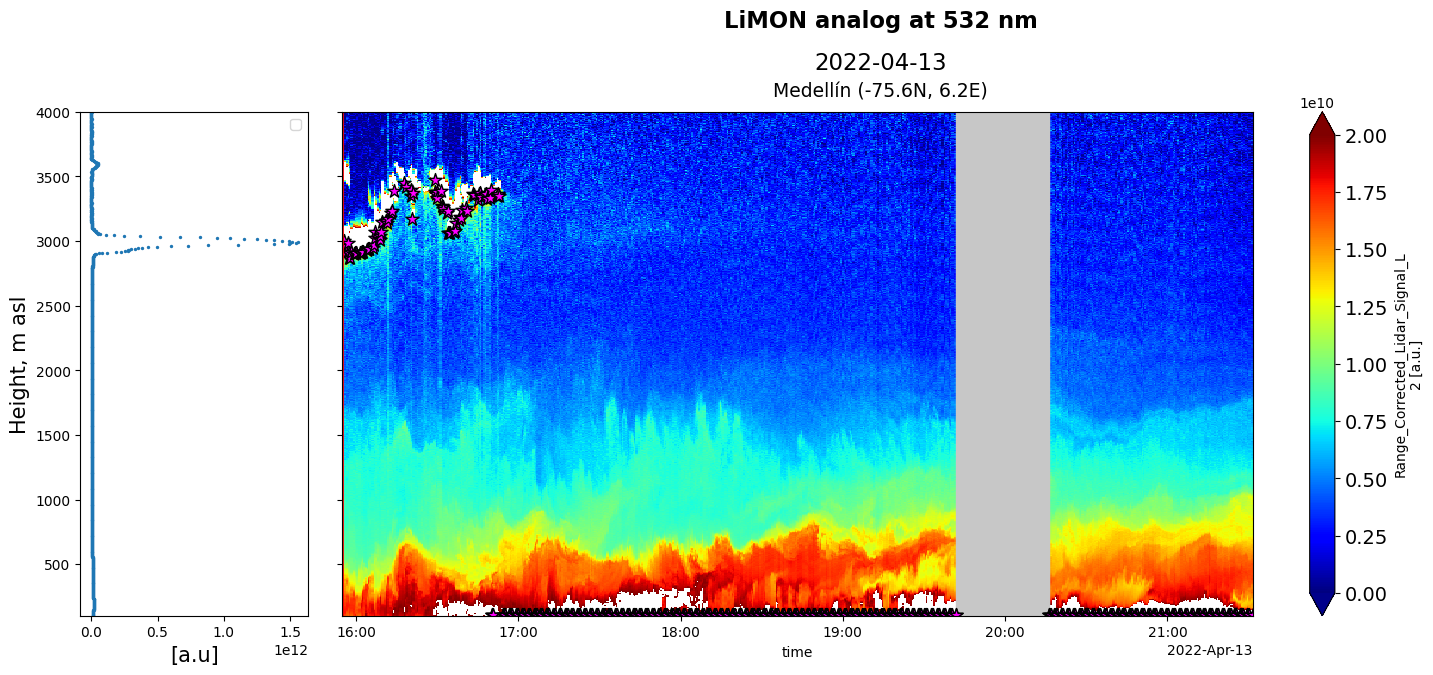

/tmp/ipykernel_10131/332254373.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


<class 'numpy.ndarray'>


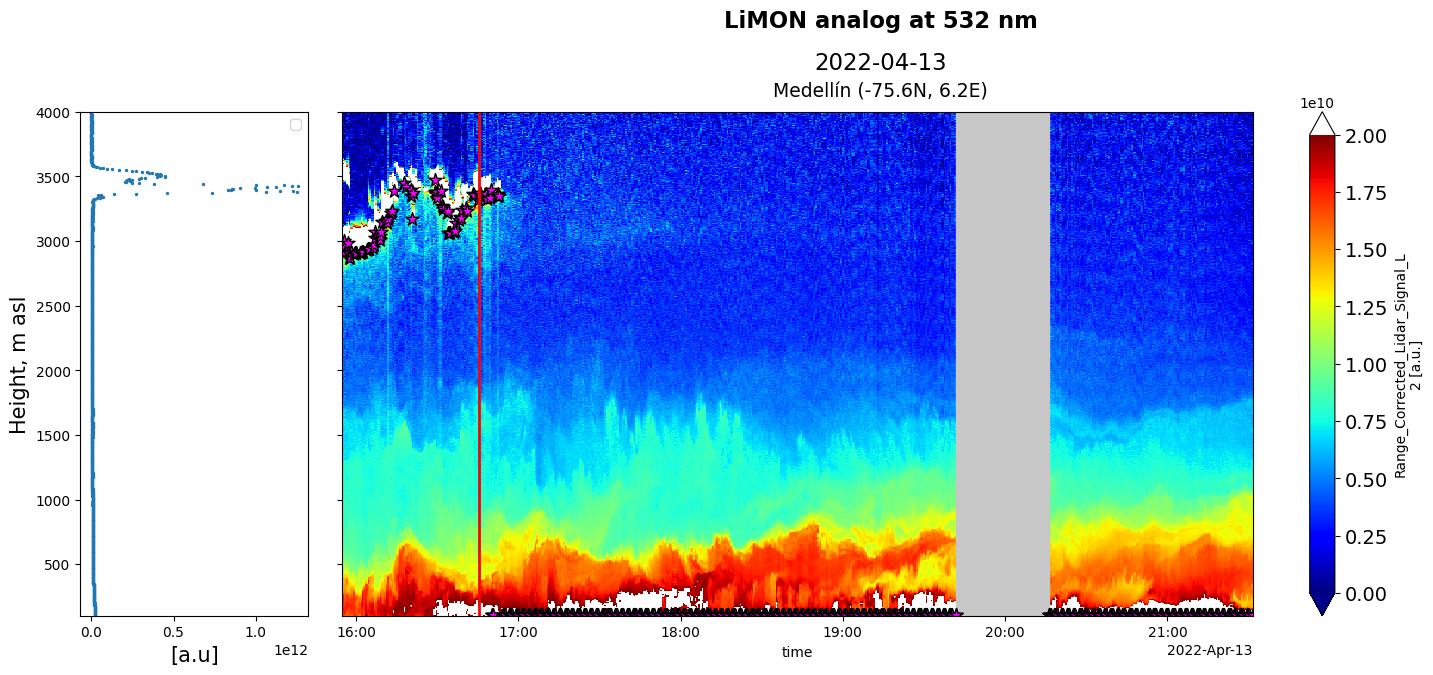

/tmp/ipykernel_10131/332254373.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


<class 'numpy.ndarray'>


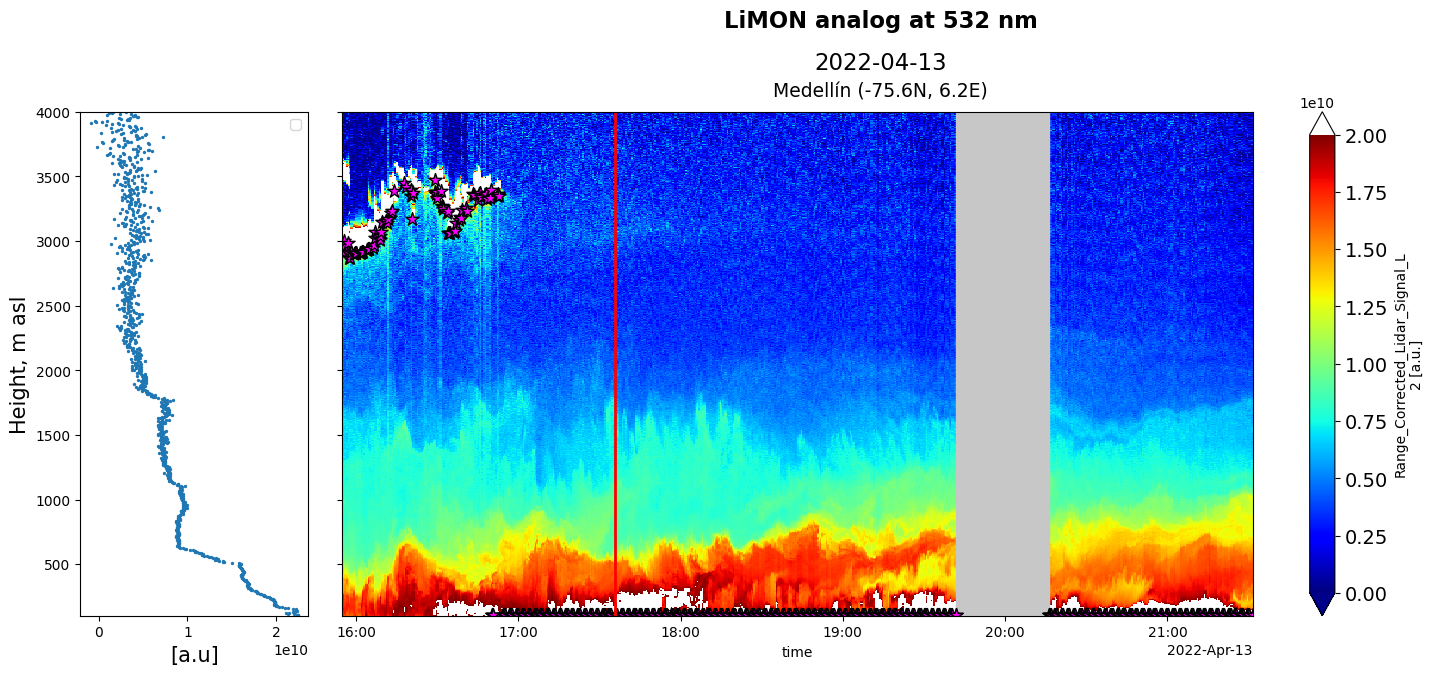

/tmp/ipykernel_10131/332254373.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


<class 'numpy.ndarray'>


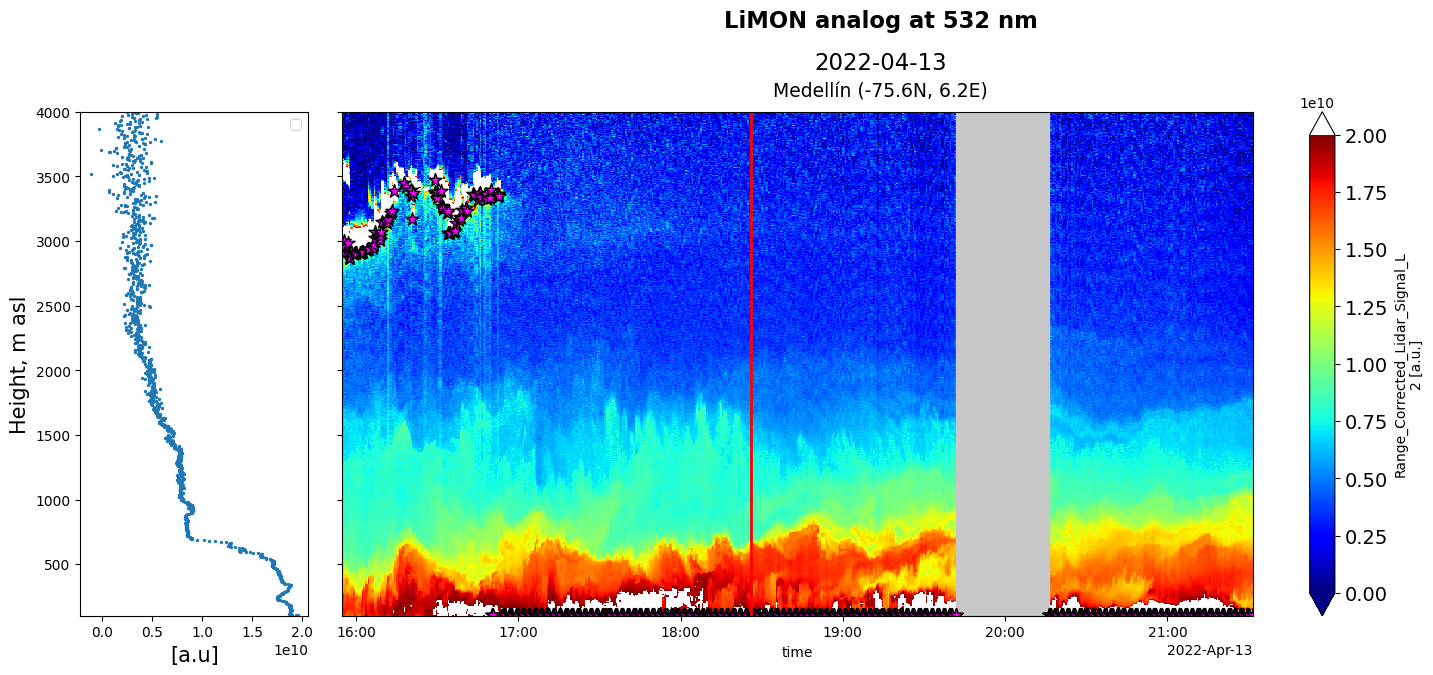

/tmp/ipykernel_10131/332254373.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


<class 'numpy.ndarray'>


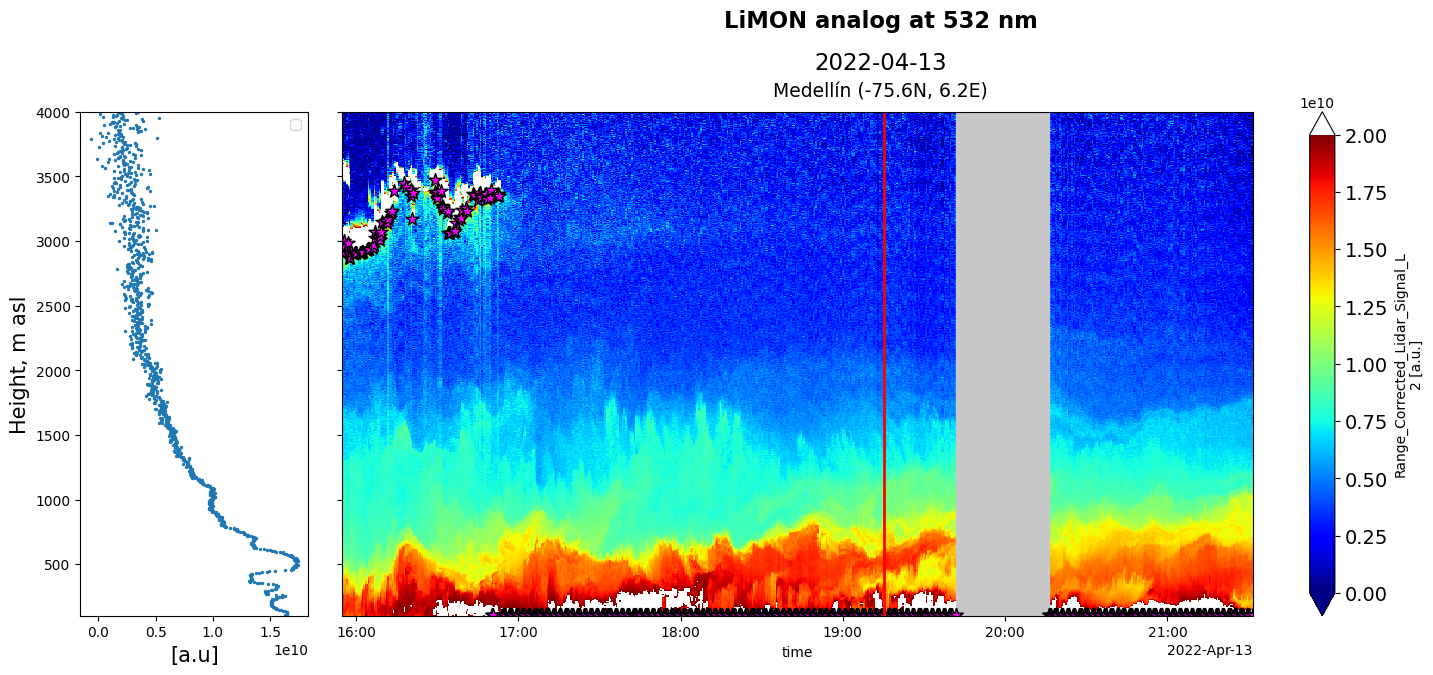

/tmp/ipykernel_10131/332254373.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


<class 'numpy.ndarray'>


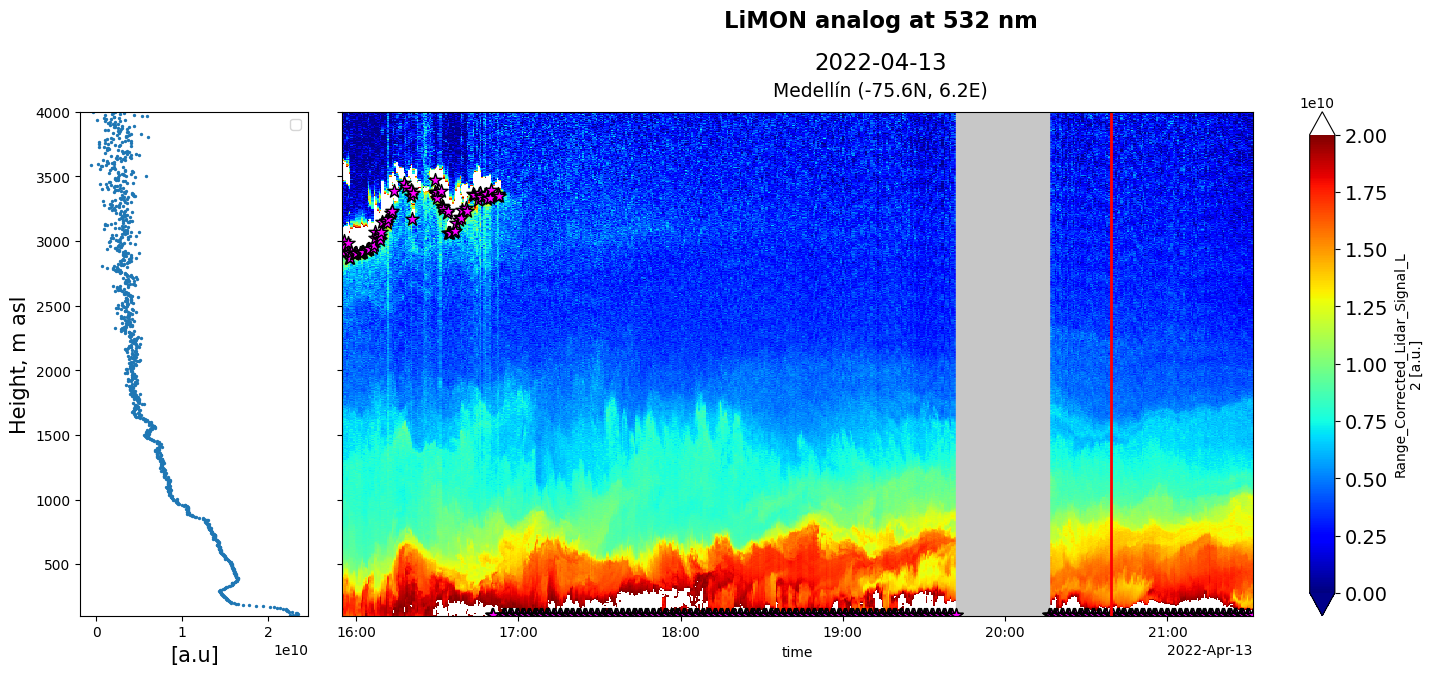

/tmp/ipykernel_10131/332254373.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


<class 'numpy.ndarray'>


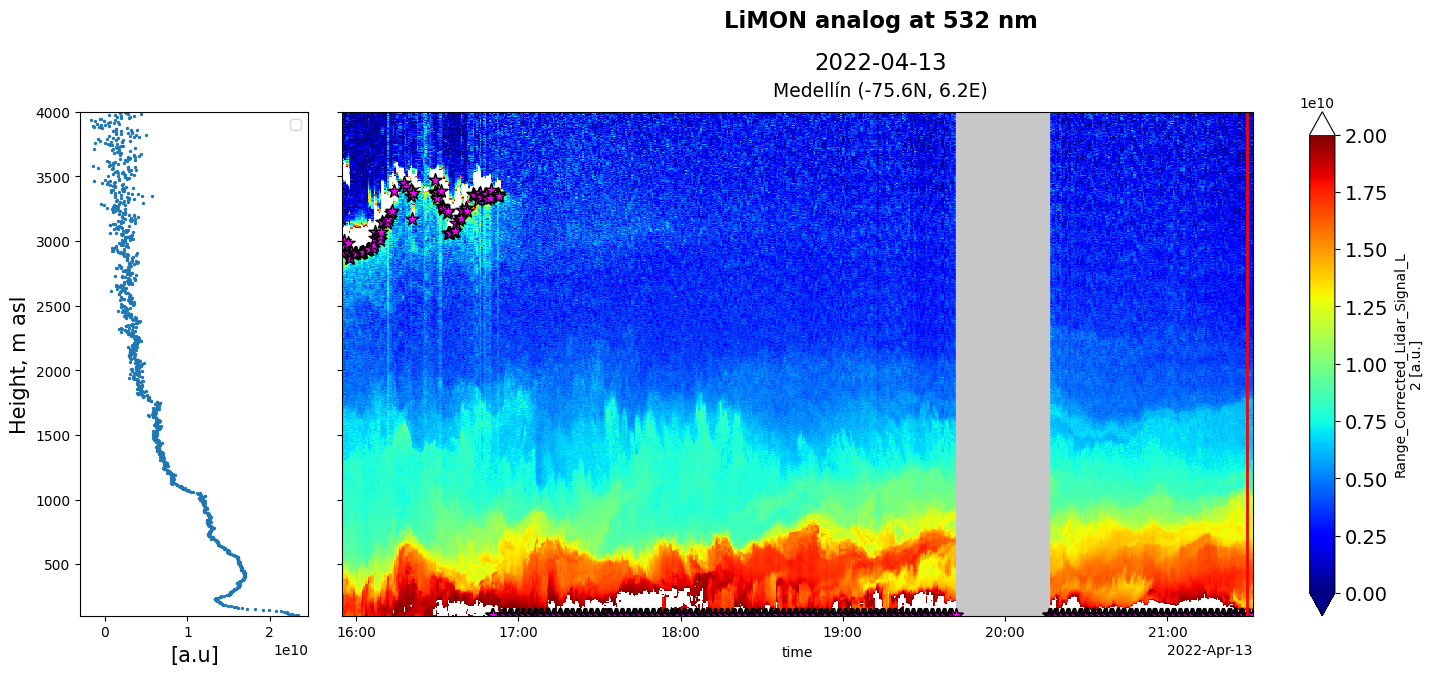

In [9]:

# pblh = nth_nonzero_height_with_time_conditions(np.abs(ds.abl_mask_mc_MHT.sel(range=slice(100, 2500)).diff(dim='range')), n_morning=0, n_evening=0)
ds['pblh'] = pbl_heights

max_range = 4000
for time in ds.time.values[::100]:
    # Define subplots con proporción 1:4 entre ax1 y ax2
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 7], sharey=True, gridspec_kw={'width_ratios': [1, 5]})


    colors = np.array(['red', 'green', 'blue', 'yellow', 'black', 'purple', 'brown', 'grey', 'magenta', 'pink'])

    # Plot en ax1
    ax1.scatter(ds.Range_Corrected_Lidar_Signal_L2.sel(time=time, range=slice(0, max_range)),
                ds.sel(range=slice(0, max_range)).range, 
    #             c=colors[ds.abl_mask_mc_MHT.sel(time=time, range=slice(0, max_range)).values.astype(np.int32)], 
    s=2)

    # ax1.scatter((C[:, 0] * (max_x - min_x) + min_x) , C[:, 1]*max_range, marker="*", s=200, c="yellow", edgecolors="black", label="cluster's center")
    # ax1.scatter(ds.Range_Corrected_Lidar_Signal_L2.sel(time=time, range=ds.pblh.sel(time=time).values, channels=0).values, ds.pblh.sel(time=time).values, s=200, marker="*", color="magenta", edgecolors="black", label="PBLH")
    ax1.legend()

    ax1.set_ylabel('Height, m asl', fontsize=15)
    ax1.set_xlabel('[a.u]', fontsize=15)

    # Plot en ax2
    plot_as_me(ds=ds.sel(range=slice(0, max_range)),
            channel='Range_Corrected_Lidar_Signal_L2',
            axes=ax2,
            qt="Limon",
            wl="532",
            signal_mode="analog",
            attrs=global_attributes,
            vmin=0,
            vmax=2e10,
            fixed_time_range=False)

    ds.pblh.plot.scatter(ax=ax2, s=100, marker="*", color="magenta", edgecolors="black")



    # Create rectangle x coordinates
    endTime = time + np.timedelta64(1, 's')
    start = mpl.dates.date2num(time)
    end = mpl.dates.date2num(endTime)
    width = end - start
    rect = mpl.patches.Rectangle((start, 0), width, max_range, linewidth=2,color='red',fill=False)
    ax2.add_patch(rect)


    # Eliminar etiquetas de ticks del eje y en ax2
    ax2.tick_params(labelleft=False)
    ax2.set_ylabel('')  # Eliminar label del eje y en ax2


    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.82, wspace=0.05, hspace=0.4)

    plt.show()


/home/medico_eafit/.local/lib/python3.11/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


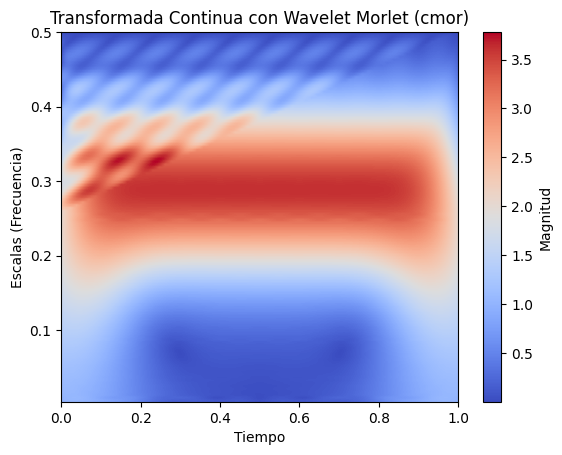

In [5]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Señal de ejemplo
signal = np.sin(2 * np.pi * 5 * np.linspace(0, 1, 500))

# Definir escalas para la CWT
scales = np.arange(1, 128)

# Usar una wavelet continua como 'cmor' en lugar de 'haar'
coeffs, freqs = pywt.cwt(signal, scales, 'cmor')

# Visualización
plt.imshow(np.abs(coeffs), extent=[0, 1, freqs[-1], freqs[0]], cmap='coolwarm', aspect='auto')
plt.xlabel('Tiempo')
plt.ylabel('Escalas (Frecuencia)')
plt.title('Transformada Continua con Wavelet Morlet (cmor)')
plt.colorbar(label="Magnitud")
plt.show()
